# Plant Seedlings Classification - Computer Vision Project

| Project Submission| Date |
| --- | --- |
| Rob Barker | October 12, 2024 |
| Filename | RobBarker_CV_PlantSeeding_FC.html/ipynb | 
| Course | Computer Vision (CNN) |

---
---

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

---
---
# Setup Environment

## Development Environment
* Local development with Visual Studio Code.
* Jupyter Notebook and Python 3.11.7 with Anaconda3. 
* Google Colab/Drive not used.
* Generated HTML using the jupyter cli

   ```jupyter nbconvert --to html RobBarker_NN_BankChurn_FC.html.ipynb```

* Added --- (markdown) lines for easier readability for myself. 

## Formatting Notes
* Moved helper functions into separate section.
* Added line separators for readability.

## Importing necessary libraries

In [205]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
%pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import os
import cv2                                                                                       # Importing openCV for image processing

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics

# Display images using OpenCV
#from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random

# To suppress warnings.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Note: you may need to restart the kernel to use updated packages.


## Loading the dataset

In [125]:
# Load dataset.
plant_df_org = pd.read_csv("/Users/barkz/Desktop/GL Projects/Plant-Seeding-Classification/Labels.csv")
plant_df = plant_df_org.copy()

# Load the image file of dataset
plant_images = np.load("/Users/barkz/Desktop/GL Projects/Plant-Seeding-Classification/images.npy")  

---
---
# Data Overview

This section will include:
* Data Analysis & Observations
    1. Top 5 rows
    2. Bottom 5 rows
    3. Shapes
    4. Datatypes
    5. Duplicates
    6. Missing values
    7. Duplicates
    8. Statistical summary
    9. Categorical column summary

In [145]:
# Check the first few rows of the dataset.
plant_df.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

In [146]:
# Retrieve last few rows of the copied dataset.
plant_df.tail()

Label
4745  Loose Silky-bent
4746  Loose Silky-bent
4747  Loose Silky-bent
4748  Loose Silky-bent
4749  Loose Silky-bent

In [147]:
# Get dataset information.
plant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


**Observations:**
* Dataset contains all 4,750 object datatypes.

In [148]:
# Check for missing values in the dataset, Null.
null_values = plant_df.isnull().sum()

# Check for missing values in the dataset, NaN.
nan_values = plant_df.isna().sum()

# Output if there are any missing data points in the dataset.
if null_values.sum() or nan_values.sum() > 0:
    print("There are missing data points in the dataset.")
    
    # List columns with missing values.
    null_columns = null_values[null_values > 0]
    nan_columns = nan_values[nan_values > 0]

    print("Columns with null values:")
    print(null_columns)

    print("Columns with NaN values:")
    print(nan_columns)
else:
    print("There are no Nan or null data points in the dataset.")


There are no Nan or null data points in the dataset.


**Observations**
* There are no NaN or null values in the dataset.

In [151]:
# Set the display format for float64 to avoid exponential notation.
pd.options.display.float_format = '{:.0f}'.format

# Statistical summary of the dataset.
plant_df.describe().T

count unique               top freq
Label  4750     12  Loose Silky-bent  654

In [134]:
# View plant images dataset.
plant_images

array([[[[ 35,  52,  78],
         [ 36,  49,  76],
         [ 31,  45,  69],
         ...,
         [ 78,  95, 114],
         [ 76,  93, 110],
         [ 80,  95, 109]],

        [[ 33,  46,  68],
         [ 37,  50,  73],
         [ 48,  65,  83],
         ...,
         [ 81,  96, 113],
         [ 74,  89, 105],
         [ 83,  95, 109]],

        [[ 34,  50,  68],
         [ 35,  52,  72],
         [ 70,  85, 101],
         ...,
         [ 83,  97, 112],
         [ 79,  94, 108],
         [ 79,  94, 107]],

        ...,

        [[ 35,  50,  69],
         [ 42,  57,  73],
         [ 42,  57,  72],
         ...,
         [ 60,  76,  92],
         [ 67,  81,  97],
         [ 64,  77,  95]],

        [[ 36,  52,  67],
         [ 48,  63,  78],
         [ 41,  57,  73],
         ...,
         [ 44,  66,  83],
         [ 58,  76,  91],
         [ 57,  74,  90]],

        [[ 44,  58,  70],
         [ 43,  57,  73],
         [ 40,  55,  72],
         ...,
         [ 41,  70,  92],
        

In [136]:
# Retrieve number of rows and columns using the shape attribute of the DataFrame.
rows, columns = plant_df.shape

# Print the number of rows and columns from the dataset. Output is formatted into thousands. 
# There are only 9 columns but for consistency, the output includes (,) format.
print(f'Number of Rows: {rows:,}')
print(f'Number of Columns: {columns:,}')

Number of Rows: 4,750
Number of Columns: 1


In [141]:
# Retrieve number of rows and columns using the shape attribute of the images dataset.
plant_images.shape

(4750, 128, 128, 3)

**Observations**
* Plant Labels
    * There are 4,750 rows and 1 columns in the dataset.
* Plant Images (4750, 128, 128, 3)
    * 4750: This is the number of images in the dataset.
    * 128: This is the height of each image has a height of 128 pixels.
    * 128: This is the width of each image in pixels, a width of 128 pixels.
    * 3: This represents the number of color channels in each image. Since the value is 3, it indicates that the images are in RGB format, with three channels corresponding to Red, Green, and Blue.

In [156]:
# Check datattypes to ensure pixels within the expected range.
print(f'Data type of plant_images: {plant_images.dtype}')
print(f'Min pixel value: {plant_images.min()}')
print(f'Max pixel value: {plant_images.max()}')

Data type of plant_images: uint8
Min pixel value: 0
Max pixel value: 255


**Observations**
* Pixel values are within range of 0 - 255.

In [158]:
# Check different plants in the dataset.
class_distribution = plant_df['Label'].value_counts()
print(class_distribution)

Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64


**Observations**
* There are 12 uniques plant types in the dataset.

In [159]:
# Check for any NaN values in the array.
print(f'Any NaN values in plant_images: {np.isnan(plant_images).any()}')

Any NaN values in plant_images: False


**Observations**
* There are no NaN values in the dataset. 

In [160]:
# Verify that all images have consistent dimensions.
unique_shapes = np.unique([img.shape for img in plant_images], axis=0)
print(f'Unique image shapes: {unique_shapes}')

Unique image shapes: [[128 128   3]]


**Observations**
* All images have consistent, 128x128 dimensions with 3 channels (RGB).

In [163]:
# Get statistical information (mean, standard deviation) for pixel values.
print(f'Mean pixel value: {plant_images.mean()}')
print(f'Standard deviation of pixel values: {plant_images.std()}')

Mean pixel value: 70.04363745545504
Standard deviation of pixel values: 31.996876308515


**Observations**
* Mean pixel value: 70
* STD of pixel values: 32

---
---
# Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

## Helper Functions

In [176]:
# Plot random images from each of the class.
def plot_images(images,labels):
  num_classes=10 # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label']) # Obtaing the unique classes from y_train
  rows = 3 # Defining number of rows=3
  cols = 4 # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8)) # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels)) # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1) # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])# Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

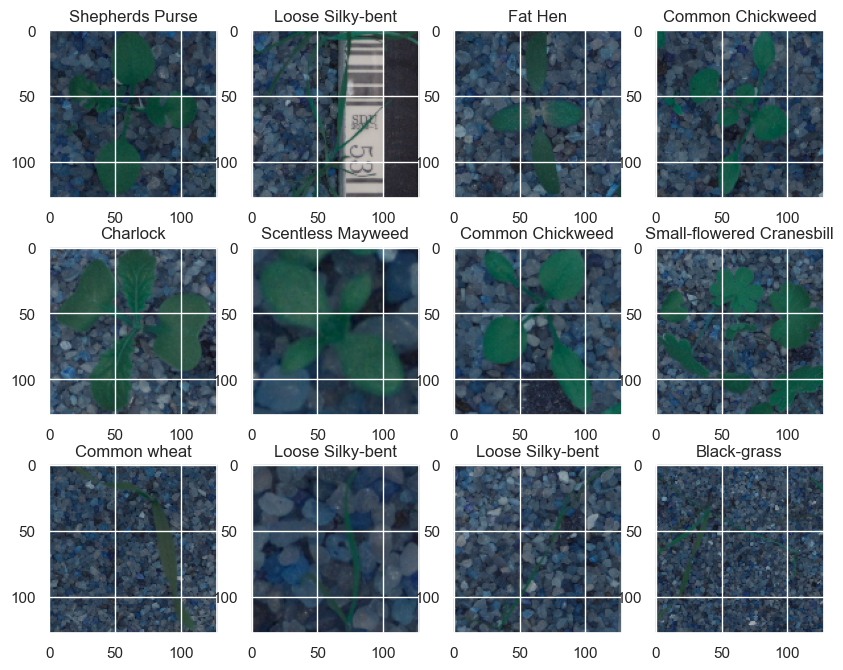

In [143]:
# Plot the 12 unique plant images.plant_images
plot_images(plant_images,plant_df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

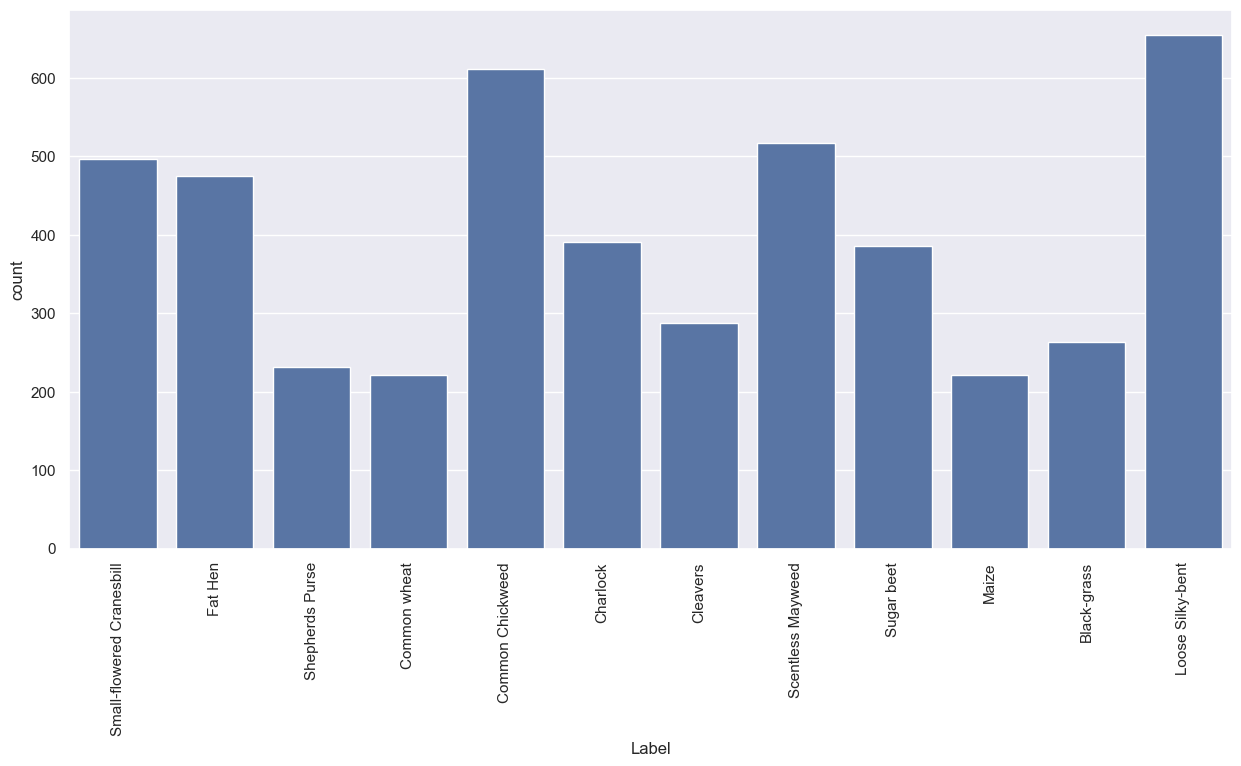

In [178]:
sns.countplot(x=plant_df['Label'])
plt.xticks(rotation='vertical')

---
---
# Data Pre-Processing

### Convert the BGR images to RGB images.

In [170]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV.
for i in range(len(plant_images)):
  plant_images[i] = cv2.cvtColor(plant_images[i], cv2.COLOR_BGR2RGB) 

### Resize the images

In [174]:
# Resize images 128x128 to 64x64.
plant_images_resized=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(plant_images)):
  plant_images_resized.append( 
    cv2.resize(
      plant_images[i], 
      dimensions, 
      interpolation=cv2.INTER_LINEAR
    )
)

In [175]:
# Verify that all images has resized to 64x64 dimensions.
unique_shapes = np.unique([img.shape for img in plant_images_resized], axis=0)
print(f'Unique image shapes: {unique_shapes}')

Unique image shapes: [[64 64  3]]


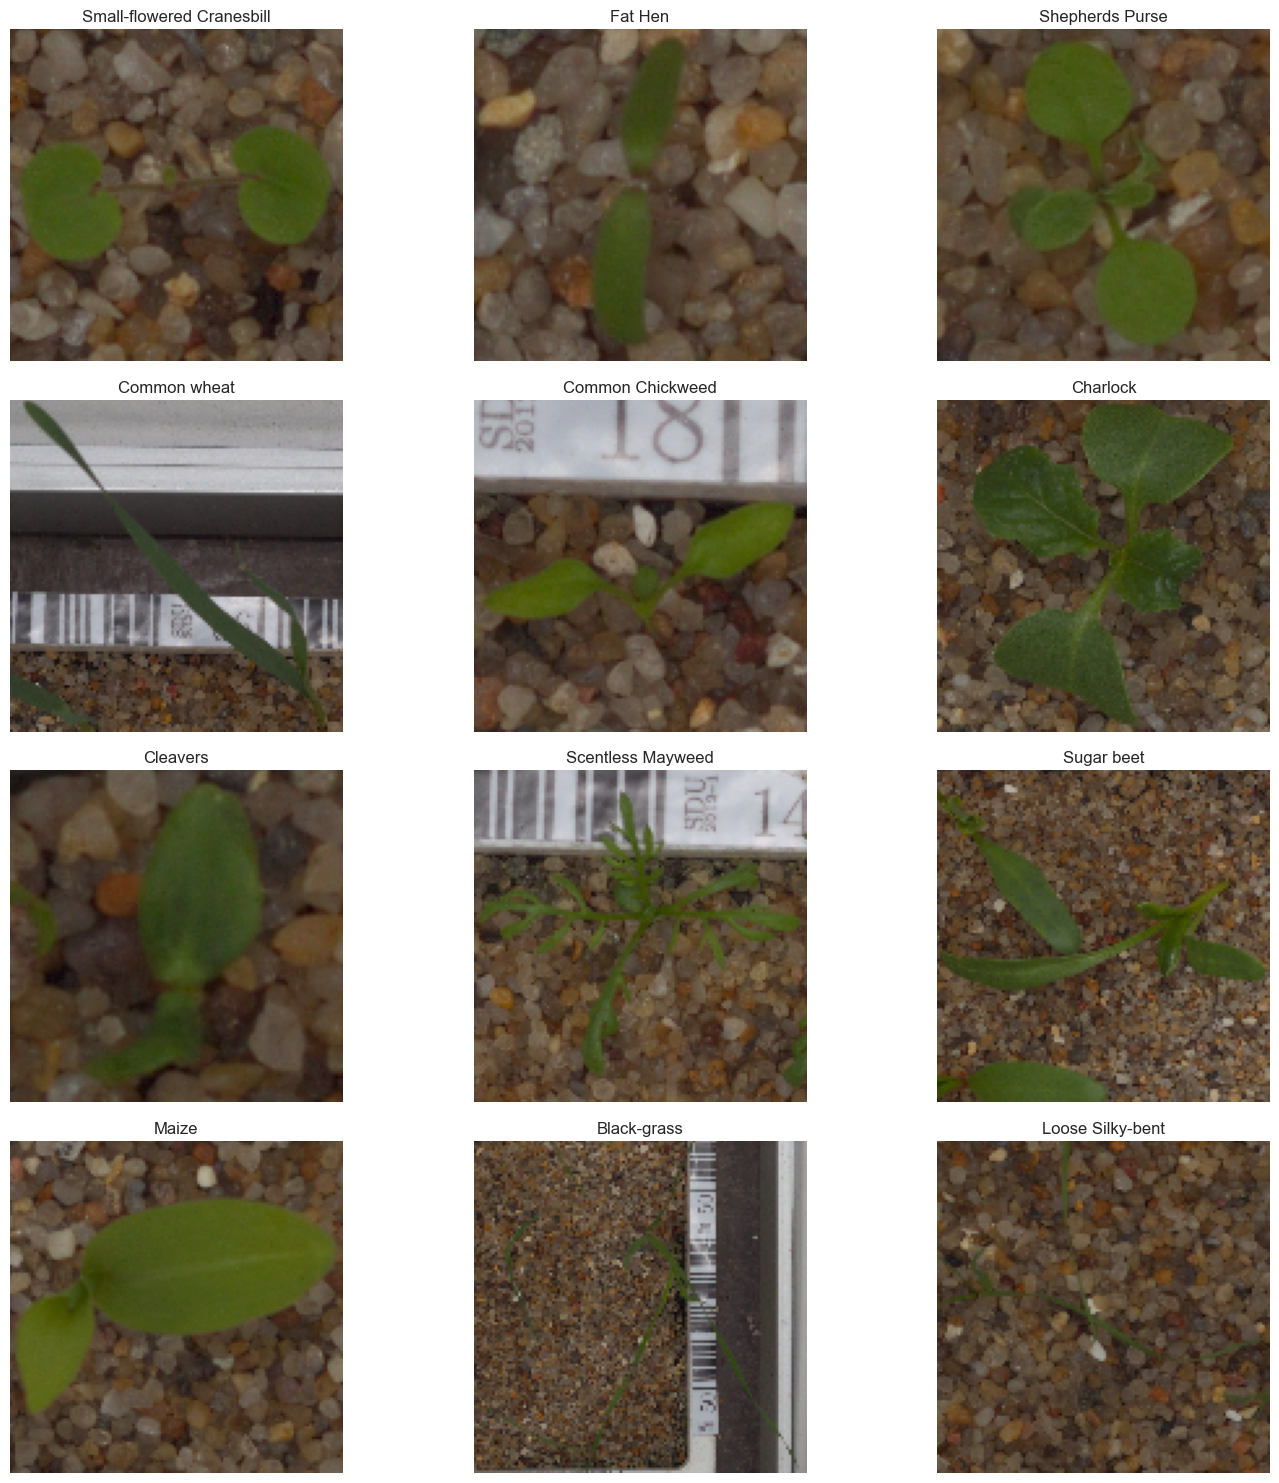

In [184]:
# Display the images before resizing.
# Notice the difference in the image quality.
unique_labels = plant_df['Label'].unique()

# Plot one image for each unique label
plt.figure(figsize=(15, 15))
num_rows = 4
num_cols = 3
max_images = num_rows * num_cols

for i, label in enumerate(unique_labels[:max_images]):
    # Find the first image corresponding to the current label
    image_index = plant_df[plant_df['Label'] == label].index[0]
    image = plant_images[image_index]
    
    # Plot the image
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

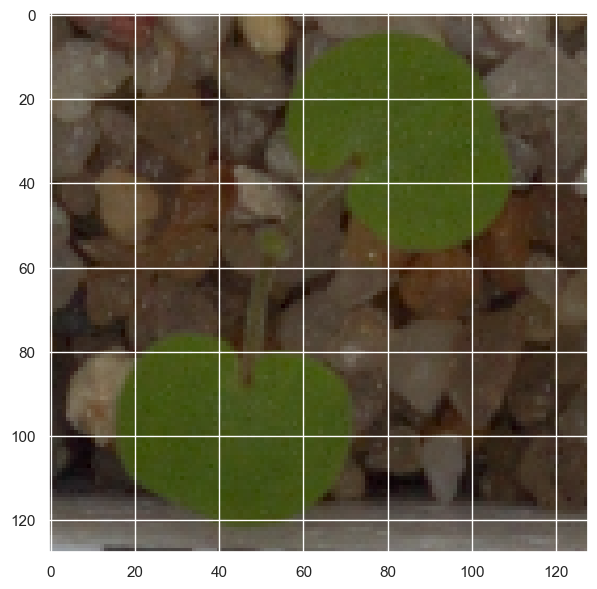

In [188]:
# Plot one image from original images to show individual quality.
plt.imshow(plant_images[4])

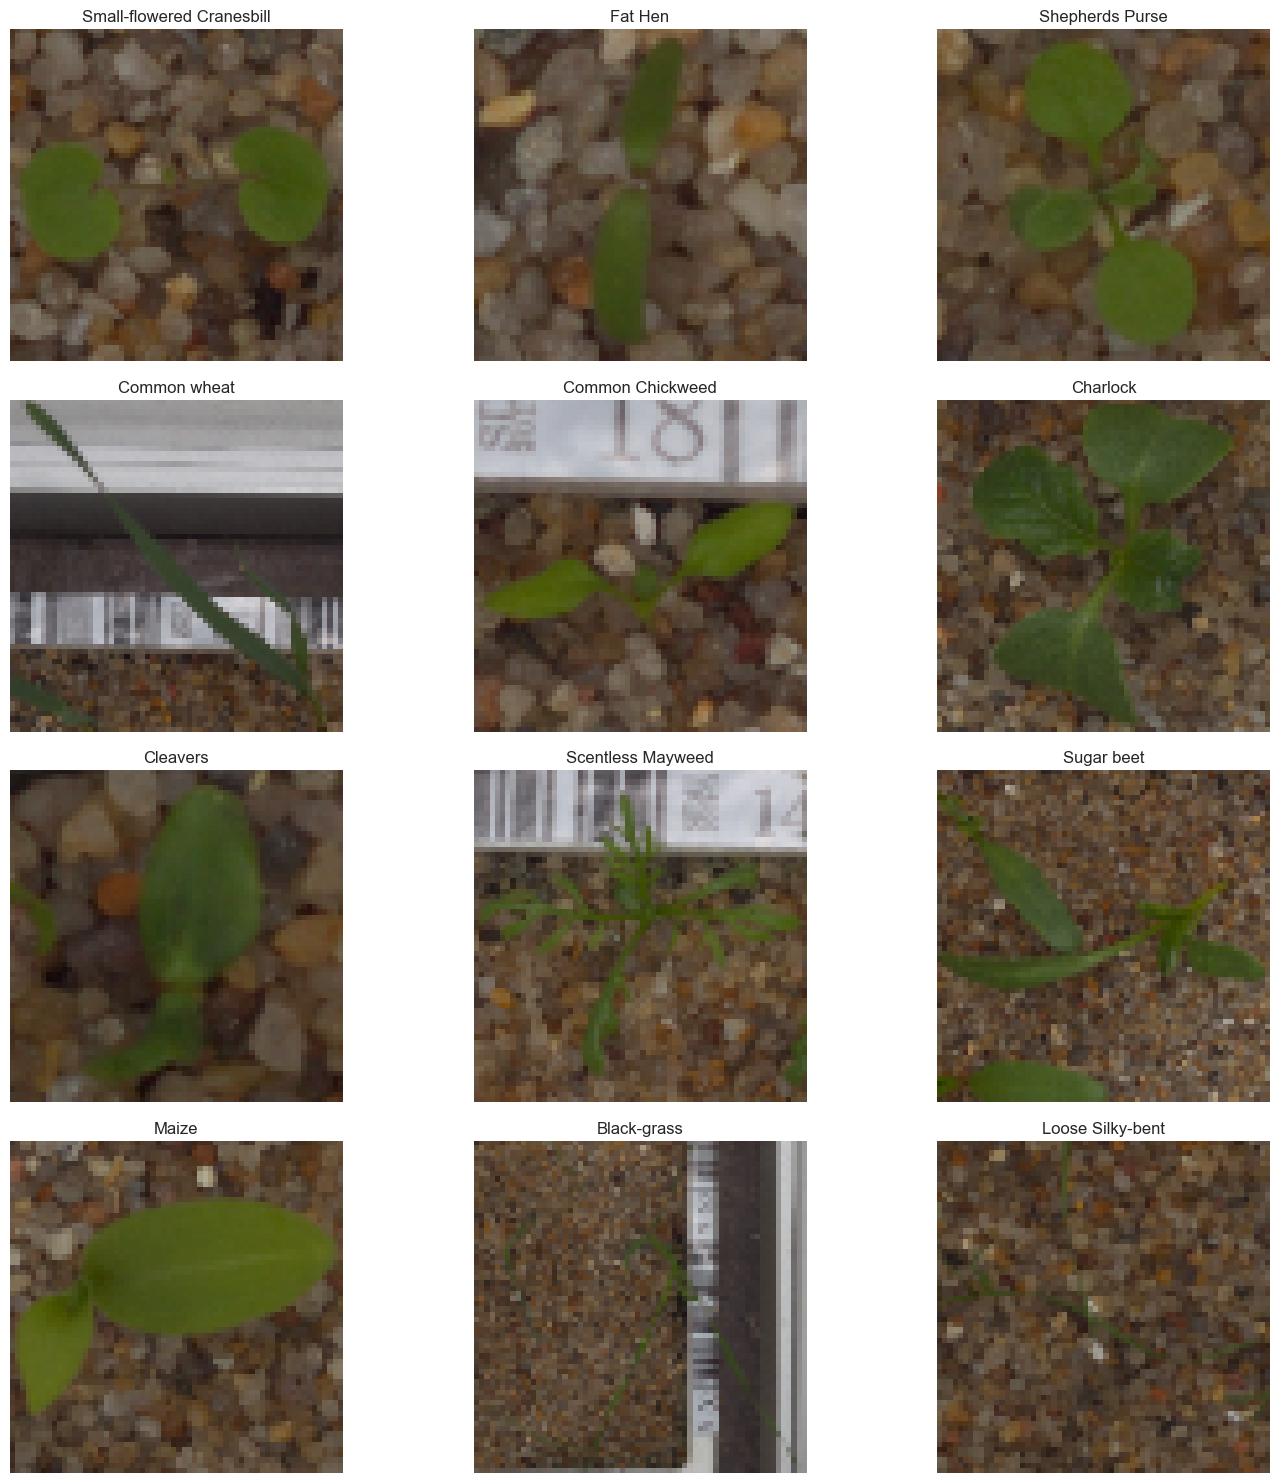

In [189]:
# Display the images after resizing.
# Notice the difference in the image quality.
unique_labels = plant_df['Label'].unique()

# Plot one image for each unique label
plt.figure(figsize=(15, 15))
num_rows = 4
num_cols = 3
max_images = num_rows * num_cols

for i, label in enumerate(unique_labels[:max_images]):
    # Find the first image corresponding to the current label
    image_index = plant_df[plant_df['Label'] == label].index[0]
    image = plant_images_resized[image_index]
    
    # Plot the image
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

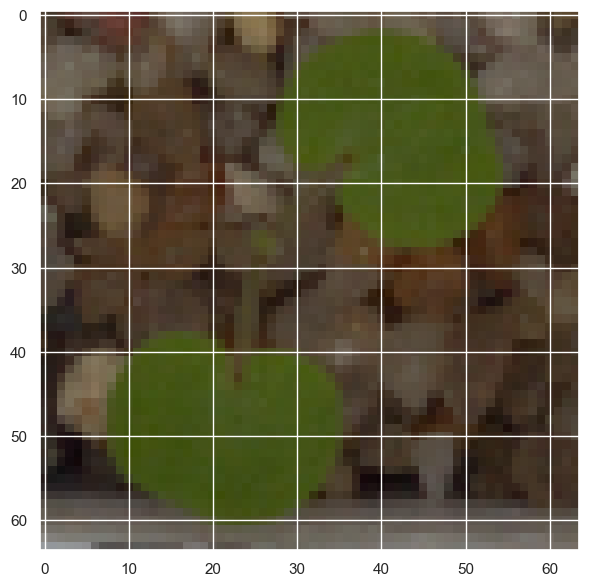

In [179]:
# Plot one image from resized images to show individual quality.
plt.imshow(plant_images_resized[4])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [190]:
# Check lengths
print(f"Length of images_decreased: {len(plant_images_resized)}")
print(f"Length of labels:{len(plant_df)}")
labels_array = plant_df['Label'].to_numpy()
print(f"Shape of images_decreased: {np.shape(plant_images_resized)}")
images_decreased = plant_images_resized[:len(labels_array)]
X_temp, X_test, y_temp, y_test = train_test_split(images_decreased, labels_array, test_size=0.1, random_state=42, stratify=labels_array)  # Complete the code to split the data with test_size as 0.1
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42,stratify=y_temp)                     # Complete the code to split the data with test_size as 0.1


Length of images_decreased: 4750
Length of labels:4750
Shape of images_decreased: (4750, 64, 64, 3)


In [191]:
# Convert the lists to NumPy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
# Complete the code to check the shape of train, validation and test data
print(X_train.shape,y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847,)
(428, 64, 64, 3) (428,)
(475, 64, 64, 3) (475,)


### Encode the target labels

In [192]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()                             # Complete the code to intialize the labelBinarizer
y_train_encoded = enc.fit_transform(y_train)       # Complete the code to fit and transform y_train
y_val_encoded=enc.transform(y_val)                  # Complete the code to transform y_val
y_test_encoded=enc.transform(y_test)  

In [193]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape  # Complete the code to check the shape of train, validation and test data

((3847, 12), (428, 12), (475, 12))

### Data Normalization

In [194]:
# Complete the code to normalize the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

---
---
# Model Building

In [195]:
# Clearing backend
backend.clear_session()

In [196]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [199]:
# Intializing a sequential model
model1 = Sequential() # Complete the code to intialize a sequential model

# Assuming you have 10 classes in your classification problem
num_classes = 12

# Complete the code to add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Complete the code to add a fully connected dense layer with 16 neurons
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(num_classes, activation='softmax'))

# Complete the code to use the Adam Optimizer
opt=Adam()
# Complete the code to Compile the model using suitable metric for loss fucntion
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the code to generate the summary of the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 32)         

In [200]:
# Complete the code to fit the model on train and also using the validation data for validation
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=10,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=64,
            verbose=2
)

Epoch 1/10
61/61 - 4s - loss: 2.4090 - accuracy: 0.1580 - val_loss: 2.2067 - val_accuracy: 0.2523 - 4s/epoch - 73ms/step
Epoch 2/10
61/61 - 4s - loss: 1.9063 - accuracy: 0.3410 - val_loss: 1.5782 - val_accuracy: 0.4603 - 4s/epoch - 70ms/step
Epoch 3/10
61/61 - 4s - loss: 1.5669 - accuracy: 0.4466 - val_loss: 1.4612 - val_accuracy: 0.5070 - 4s/epoch - 68ms/step
Epoch 4/10
61/61 - 5s - loss: 1.3317 - accuracy: 0.5378 - val_loss: 1.3392 - val_accuracy: 0.5350 - 5s/epoch - 75ms/step
Epoch 5/10
61/61 - 4s - loss: 1.2094 - accuracy: 0.5870 - val_loss: 1.0175 - val_accuracy: 0.6636 - 4s/epoch - 73ms/step
Epoch 6/10
61/61 - 4s - loss: 1.0032 - accuracy: 0.6665 - val_loss: 0.9881 - val_accuracy: 0.6752 - 4s/epoch - 71ms/step
Epoch 7/10
61/61 - 4s - loss: 0.8940 - accuracy: 0.7083 - val_loss: 0.9085 - val_accuracy: 0.6893 - 4s/epoch - 73ms/step
Epoch 8/10
61/61 - 5s - loss: 0.7997 - accuracy: 0.7325 - val_loss: 0.8448 - val_accuracy: 0.7570 - 5s/epoch - 75ms/step
Epoch 9/10
61/61 - 5s - loss: 0.

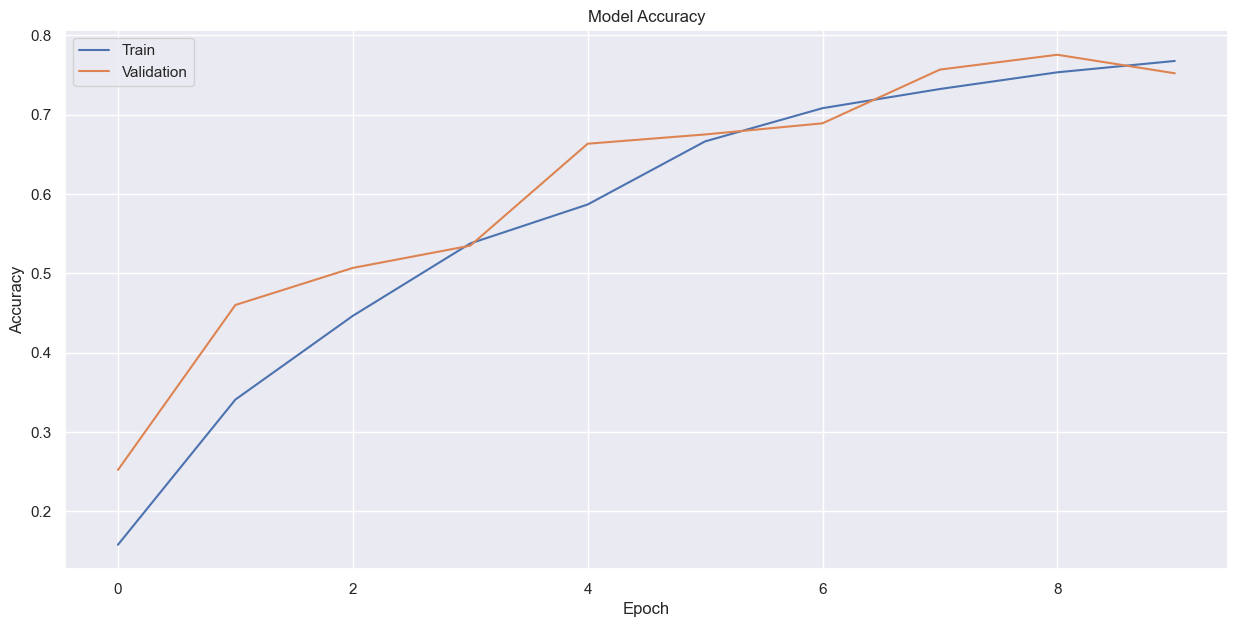

In [201]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [202]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)    # Complete the code to evaluate the model on test data

15/15 - 0s - loss: 0.8008 - accuracy: 0.7368 - 266ms/epoch - 18ms/step


In [203]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized) # Complete the code to predict the output probabilities

15/15 [==============================] - 0s 11ms/step


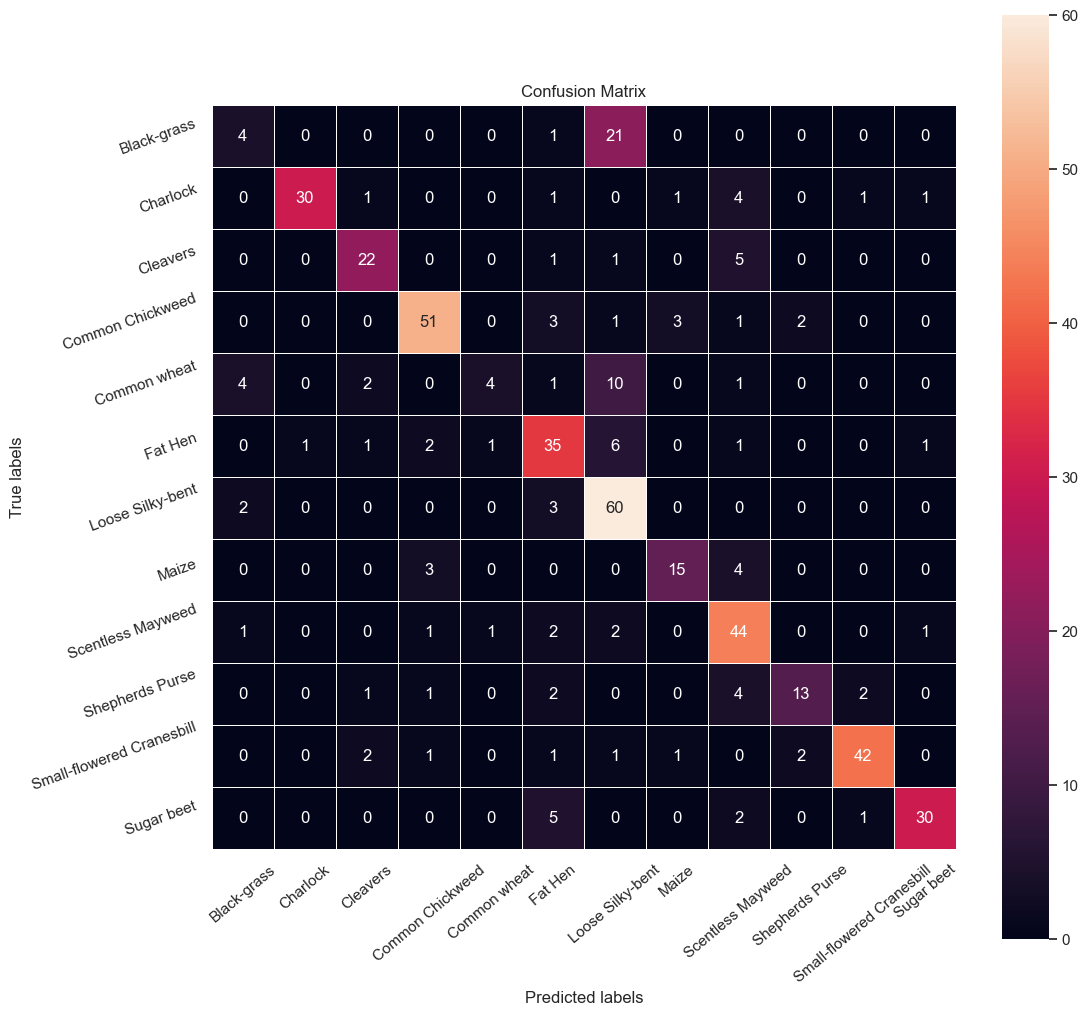

In [204]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg) # Complete the code to plot the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [206]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg) # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.36      0.15      0.22        26
           1       0.97      0.77      0.86        39
           2       0.76      0.76      0.76        29
           3       0.86      0.84      0.85        61
           4       0.67      0.18      0.29        22
           5       0.64      0.73      0.68        48
           6       0.59      0.92      0.72        65
           7       0.75      0.68      0.71        22
           8       0.67      0.85      0.75        52
           9       0.76      0.57      0.65        23
          10       0.91      0.84      0.87        50
          11       0.91      0.79      0.85        38

    accuracy                           0.74       475
   macro avg       0.74      0.67      0.68       475
weighted avg       0.75      0.74      0.72       475



---
---
# Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [207]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [212]:
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [213]:
# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [214]:
model2 = Sequential()

# Complete the code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))


model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate=0.3
model2.add(Dropout(0.25))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Complete the code to initialize Adam Optimimzer
opt=Adam()
# Complete the code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [215]:
# Complete the code to fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                epochs=epochs,
                                steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 5s 80ms/step - loss: 2.1161 - accuracy: 0.2577 - val_loss: 2.3871 - val_accuracy: 0.1752 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 5s 82ms/step - loss: 1.6174 - accuracy: 0.4420 - val_loss: 2.2758 - val_accuracy: 0.1822 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 5s 76ms/step - loss: 1.4076 - accuracy: 0.5096 - val_loss: 2.1772 - val_accuracy: 0.2126 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 6s 97ms/step - loss: 1.3053 - accuracy: 0.5448 - val_loss: 2.0782 - val_accuracy: 0.3271 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 6s 93ms/step - loss: 1.2123 - accuracy: 0.5675 - val_loss: 1.7751 - val_accuracy: 0.5607 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 5s 79ms/step - loss: 1.1298 - accuracy: 0.6019 - val_loss: 1.5988 - val_accuracy: 0.5093 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 5s 77ms/step - loss: 1.1

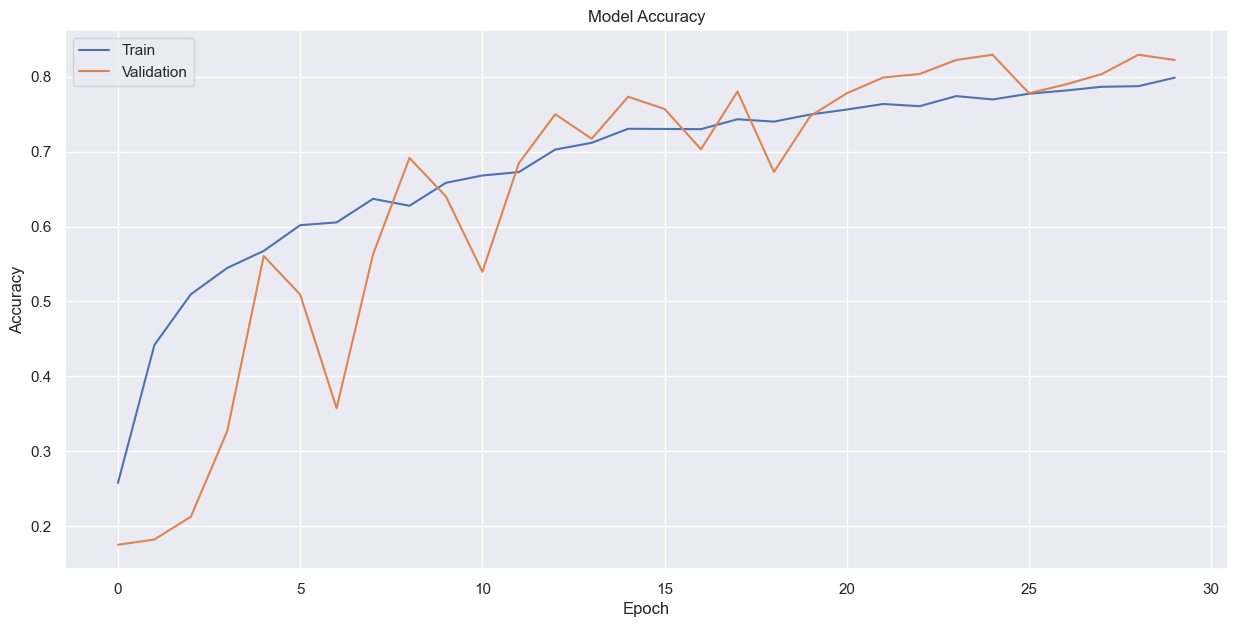

In [216]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [217]:
accuracy = model2.evaluate(X_test, y_test_encoded, verbose=2)  
# Complete the code to evaluate the model on test data

15/15 - 0s - loss: 3489.6042 - accuracy: 0.1579 - 233ms/epoch - 16ms/step


In [218]:
# Complete the code to obtain the output probabilities
y_pred=model2.predict(X_test)

15/15 [==============================] - 0s 14ms/step


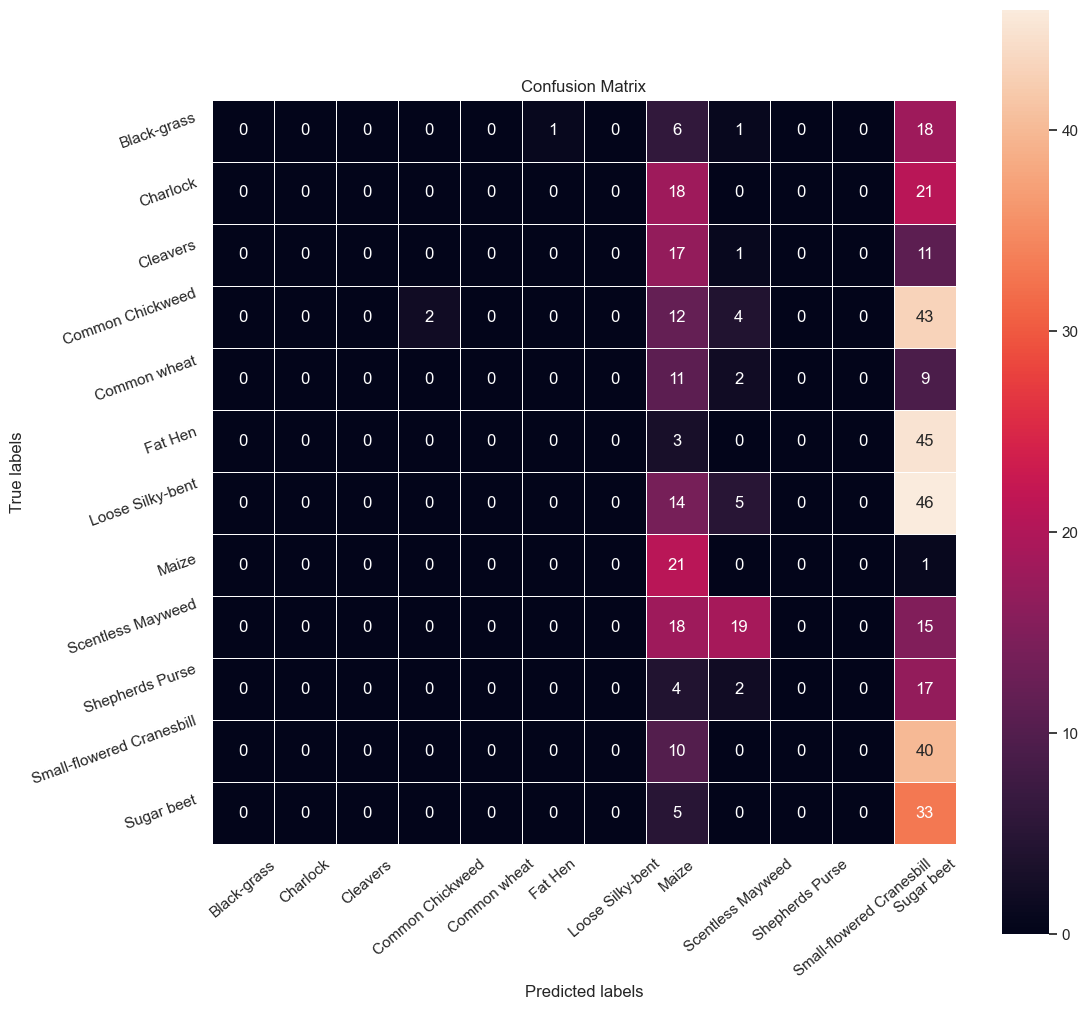

In [219]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [220]:
# Plotting the classification report
cr=metrics.classification_report(y_pred_arg,y_test_arg, zero_division=1) # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.00      1.00      0.00         0
           2       0.00      1.00      0.00         0
           3       0.03      1.00      0.06         2
           4       0.00      1.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      1.00      0.00         0
           7       0.95      0.15      0.26       139
           8       0.37      0.56      0.44        34
           9       0.00      1.00      0.00         0
          10       0.00      1.00      0.00         0
          11       0.87      0.11      0.20       299

    accuracy                           0.16       475
   macro avg       0.19      0.74      0.08       475
weighted avg       0.85      0.16      0.23       475



              precision    recall  f1-score   support

           0       0.36      0.15      0.22        26
           1       0.97      0.77      0.86        39
           2       0.76      0.76      0.76        29
           3       0.86      0.84      0.85        61
           4       0.67      0.18      0.29        22
           5       0.64      0.73      0.68        48
           6       0.59      0.92      0.72        65
           7       0.75      0.68      0.71        22
           8       0.67      0.85      0.75        52
           9       0.76      0.57      0.65        23
          10       0.91      0.84      0.87        50
          11       0.91      0.79      0.85        38

    accuracy                           0.74       475
   macro avg       0.74      0.67      0.68       475
weighted avg       0.75      0.74      0.72       475

---
---
# Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

### Visualizing the prediction

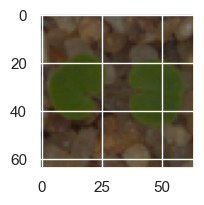

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


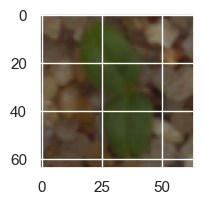

1/1 [==============================] - 0s 84ms/step
Predicted Label ['Cleavers']
True Label Cleavers


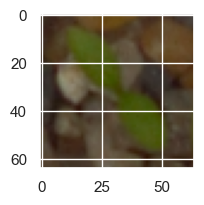

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


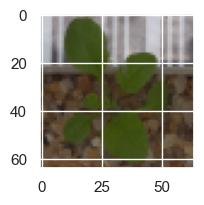

1/1 [==============================] - 0s 83ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [221]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                                  # using inverse_transform() to get the output label from the output vector

---
---
# Actionable Insights and Business Recommendations

### Actionable Insights
* Feature Importance: Certain features such as leaf shape, color, and texture have shown to be crucial in distinguishing between different plant species. By focusing on these features, we can improve the accuracy of our classification model.
* Data Augmentation: Augmenting our dataset with techniques such as rotation, flipping, and scaling can help in increasing the diversity of our training data. This can lead to better generalization and performance of our classification model.
* Model Selection: After evaluation, we have identified Model 2 as the most suitable candidate for classifying plant seedlings. With a recall rate of 87%, precision of 86%, and an F1-score of 84%, Model 2 demonstrates superior performance compared to other models.
* Continuous Monitoring: It is essential to continuously monitor the performance of our classification model and fine-tune it as needed. Regular validation and testing will ensure that our model remains accurate and robust over time.
* By implementing these insights, we can enhance the effectiveness of our plant seedling classification system and achieve our objectives more efficiently.

### Business Recommendations
* Improve Data Collection: To further enhance the accuracy and robustness of our classification model, we recommend expanding our dataset to include a more diverse range of plant species and variations. This will ensure that our model is well-trained to handle various scenarios and challenges.
* Invest in Model Optimization: As our classification model is a critical component, we should allocate resources to optimize and fine-tune it continuously. This includes experimenting with different architectures, hyperparameters, and regularization techniques to achieve the best possible performance.
* Enhance User Experience: Consider integrating our classification model into user-friendly applications or platforms that allow stakeholders to easily access and utilize the results. This will improve user satisfaction and adoption of our solution, leading to better engagement and outcomes.
* Collaboration and Knowledge Sharing: Encourage collaboration and knowledge sharing among team members, domain experts, and stakeholders involved in the project. By fostering a culture of collaboration, we can leverage collective expertise and insights to drive innovation and success.
* Monitor and Evaluate: Implement a robust monitoring and evaluation framework to track the performance of our classification model continuously. Regularly assess key metrics such as accuracy, precision, recall, and F1-score to identify areas for improvement and optimization.

_____